Датасет Airline Passenger Satisfaction       
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

Бизнес задача: Предсказать будет ли удовлетворен пассажир путешествием или нет         

Задача машинного обучения: бинарная классификация

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

In [ ]:
train_dt = pd.read_csv('train.csv')
train_dt.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Первичный анализ данных

In [ ]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Целевая переменная satisfaction и 4 атрибута выражены категориальным типом данных.      


In [ ]:
train_dt.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Пропуски наблюдаются только у признака Arrival Delay in Minutes

In [ ]:
train_dt.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Все атрибуты помимо Departure Delay in Minutes, Arrival Delay in Minutes, Flight Distance, Age, id, Unnamed: 0 отображают удовлетворенность сервисом, которая оценивается от 0 до 5.           
Unnamed: 0 это индекс - не несет важной информации для предсказания.


In [ ]:
train_dt.describe(exclude=[np.number])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


Удалим столбцы 'Unnamed: 0' и 'id'

In [ ]:
train_dt = train_dt.drop(['Unnamed: 0', 'id'], axis=1)

# Разведывательный анализ данных

Выведем графики распределения всех признаков

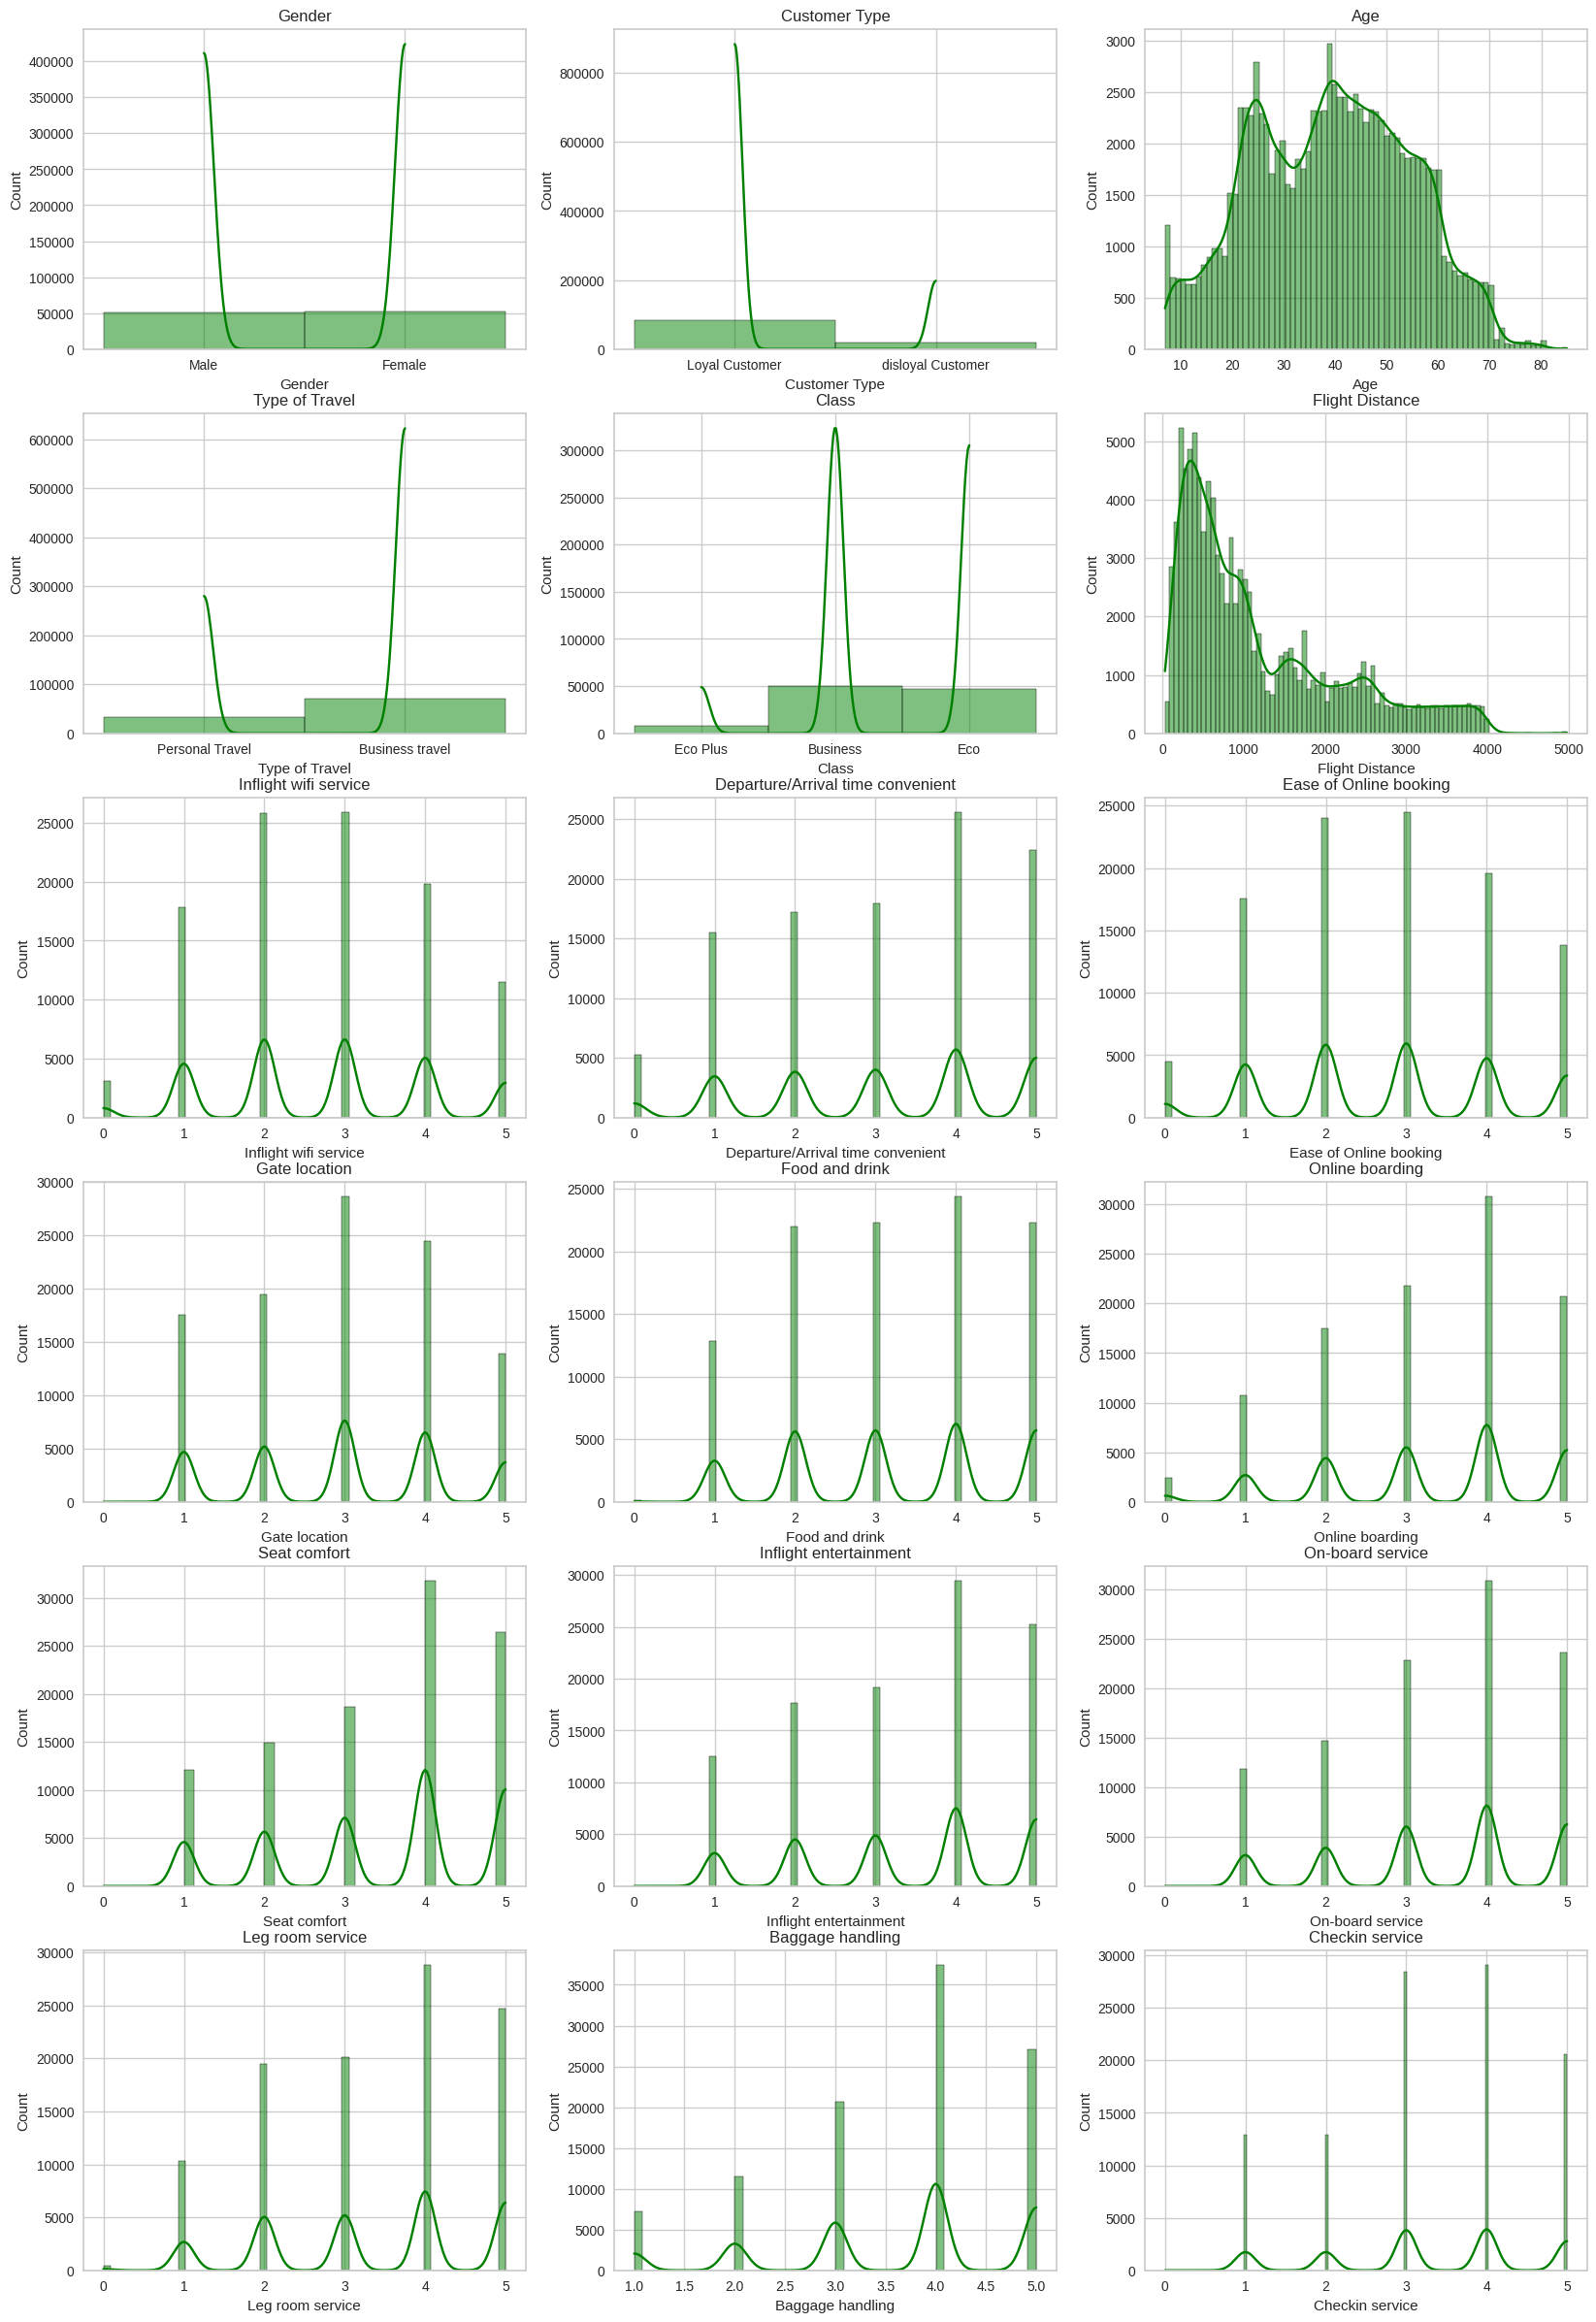

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(20,30))

for col, ax in zip(train_dt, axs.ravel()):
    ax = sns.histplot(ax=ax, data=train_dt, x=train_dt[col], kde=True, color='green')
    ax.set_title(col)

Можно заметить, что больше всего полетов было совершено не небольшие расстояния (в районе 500)                      
В основном пассажиры удовлетворены обслуживанием багажа(Baggage handling)(Оценки 4-5)            
БОльшая часть считает, что место удобное



Посмотрим на распределение категориальных признаков

<ipython-input-15-cf5458cca32e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, x=counts.index, y=counts.values, palette='YlOrRd')
<ipython-input-15-cf5458cca32e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, x=counts.index, y=counts.values, palette='YlOrRd')
<ipython-input-15-cf5458cca32e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, x=counts.index, y=counts.values, palette='YlOrRd')
<ipython-input-15-cf5458cca32e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

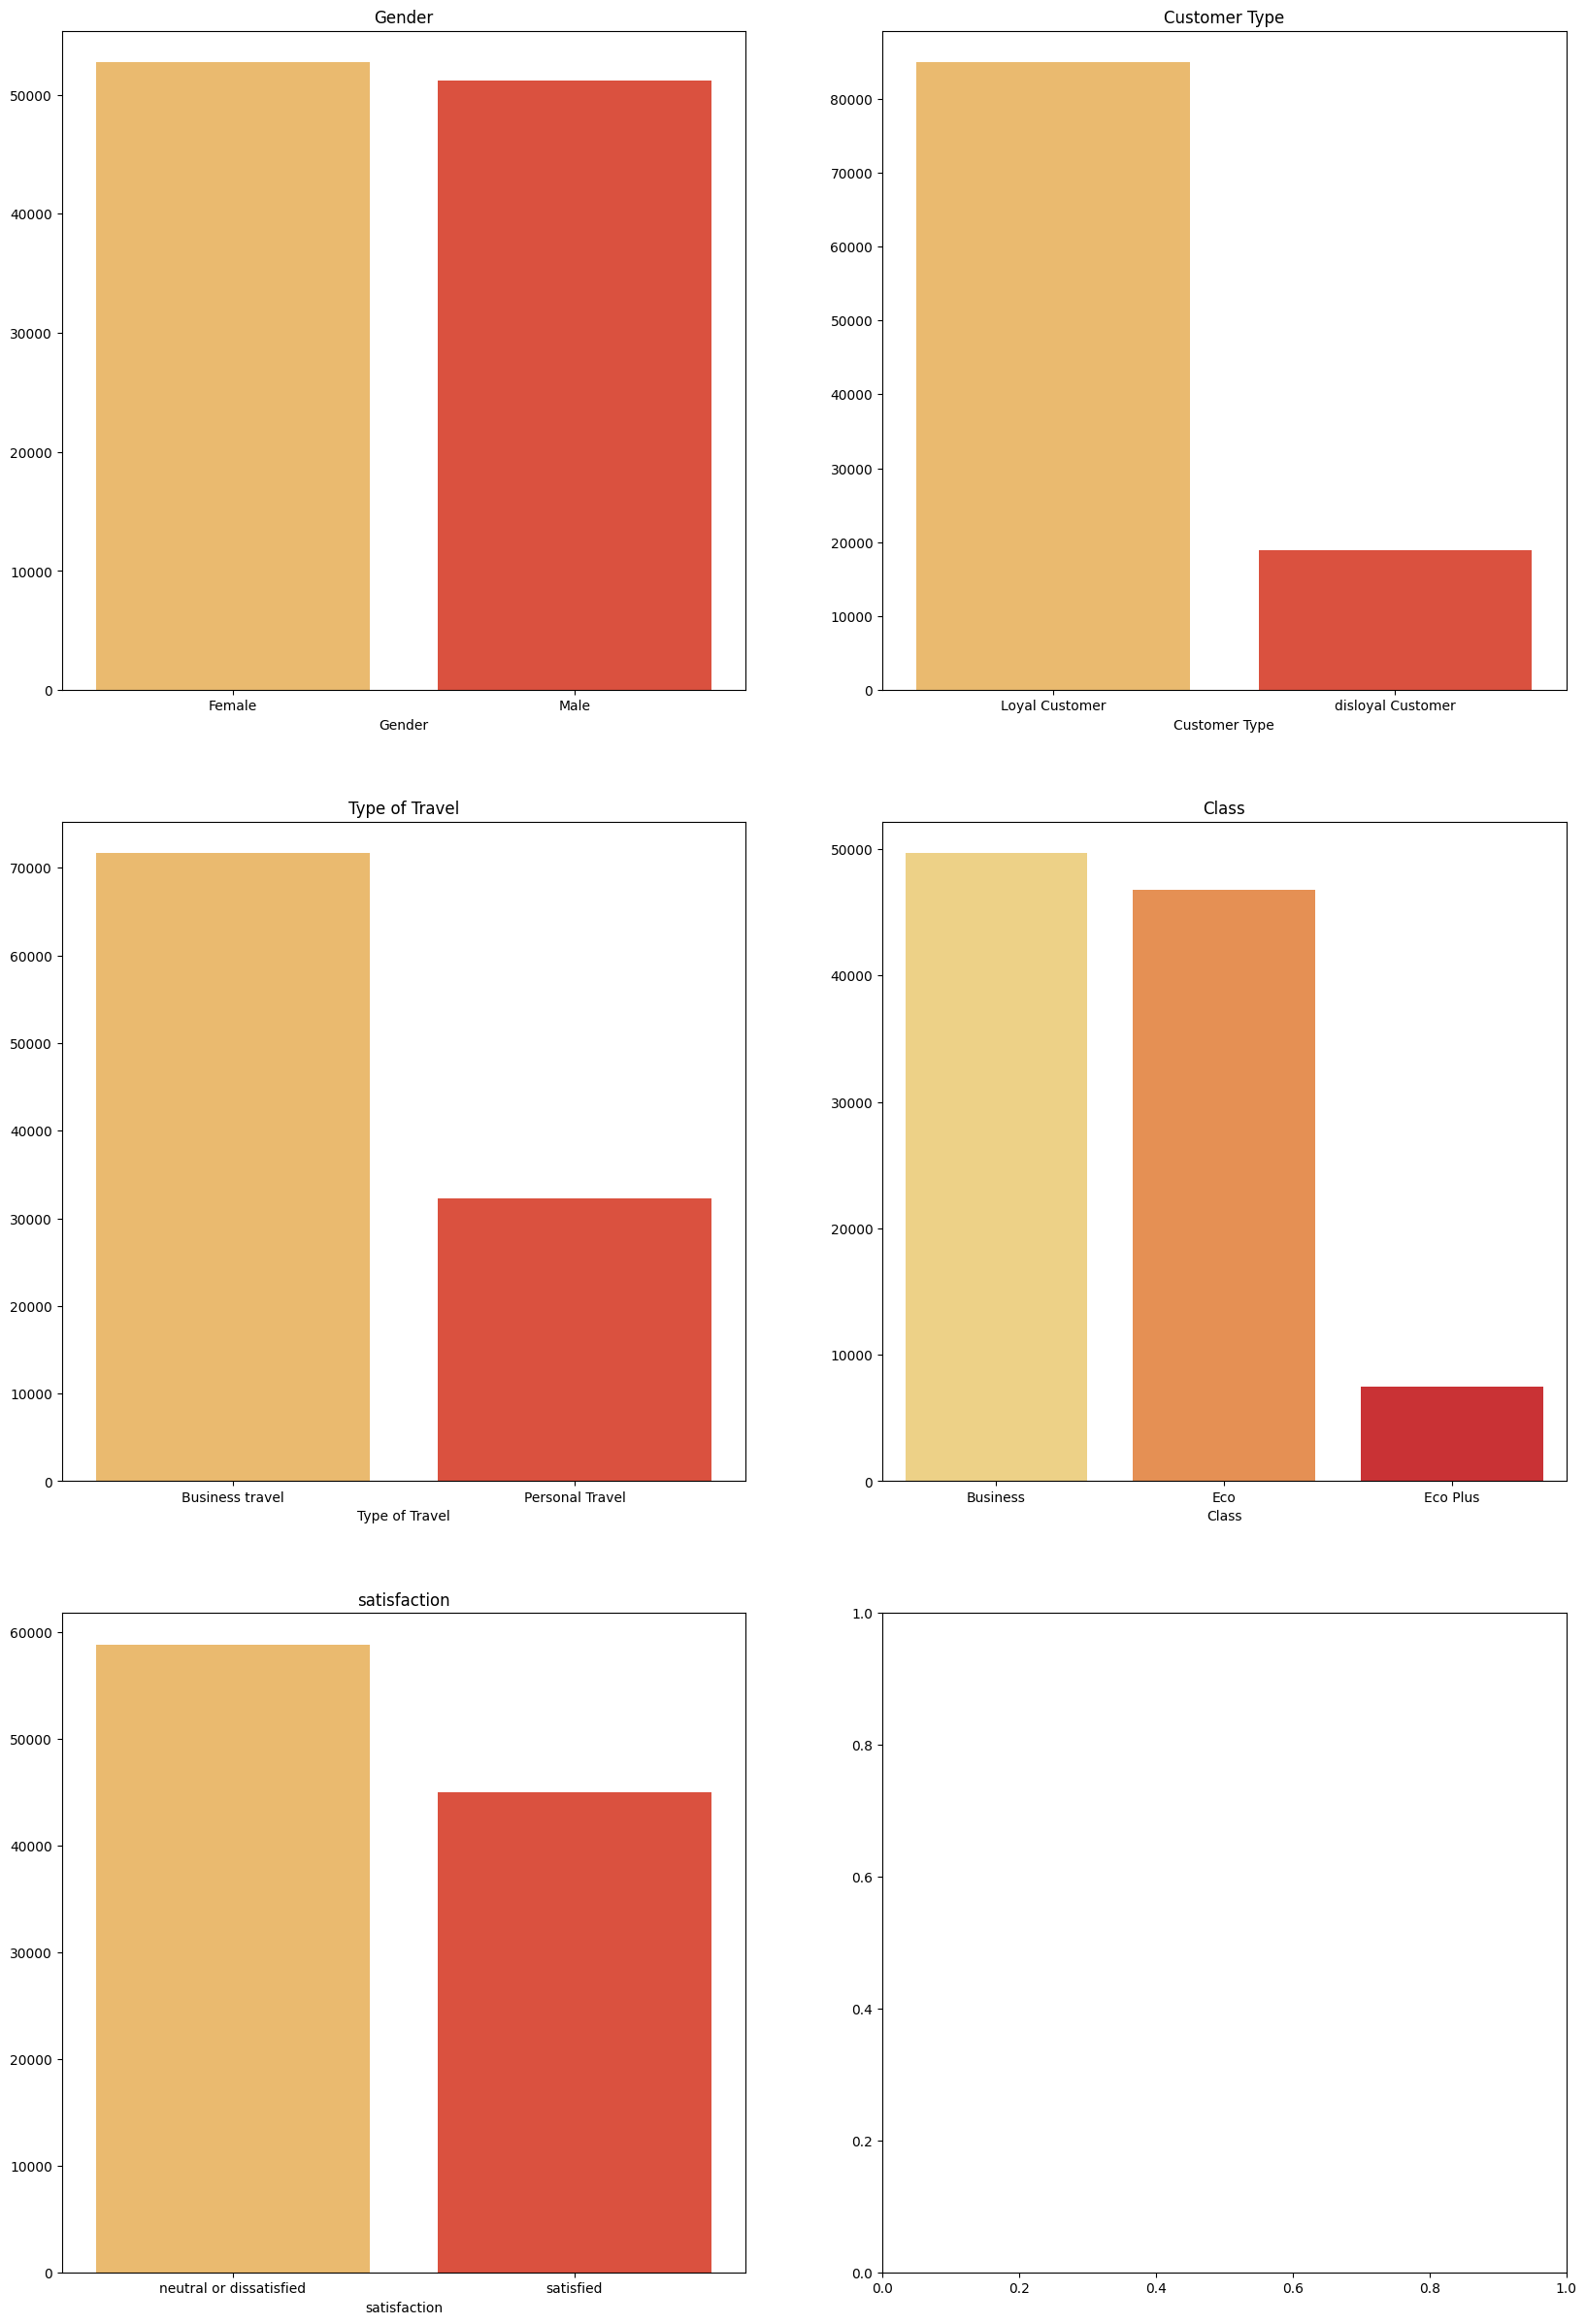

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,30))

for col, ax in zip(train_dt.select_dtypes(exclude=['float64', 'int64']), axs.ravel()):
    counts = train_dt[col].value_counts()
    ax = sns.barplot(ax=ax, x=counts.index, y=counts.values, palette='YlOrRd')
    ax.set_title(col)

В основном летают классами бизнес и эконом. Большая часть респондентов путешествовали по работе. Также можно заметить, что в большинстве своем пассажиры лояльны.     
Число женщин почти такое же как и мужчин.     
Что касается целевой переменной - чаще встречаются пассажиры не довольные поездкой.



In [ ]:
# Для наглядности
(train_dt.satisfaction.value_counts()/len(train_dt))*100

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: count, dtype: float64

Можем заметить, что дисбаланса классов не наблюдается.

Выведем матрицу корреляции

<Axes: >

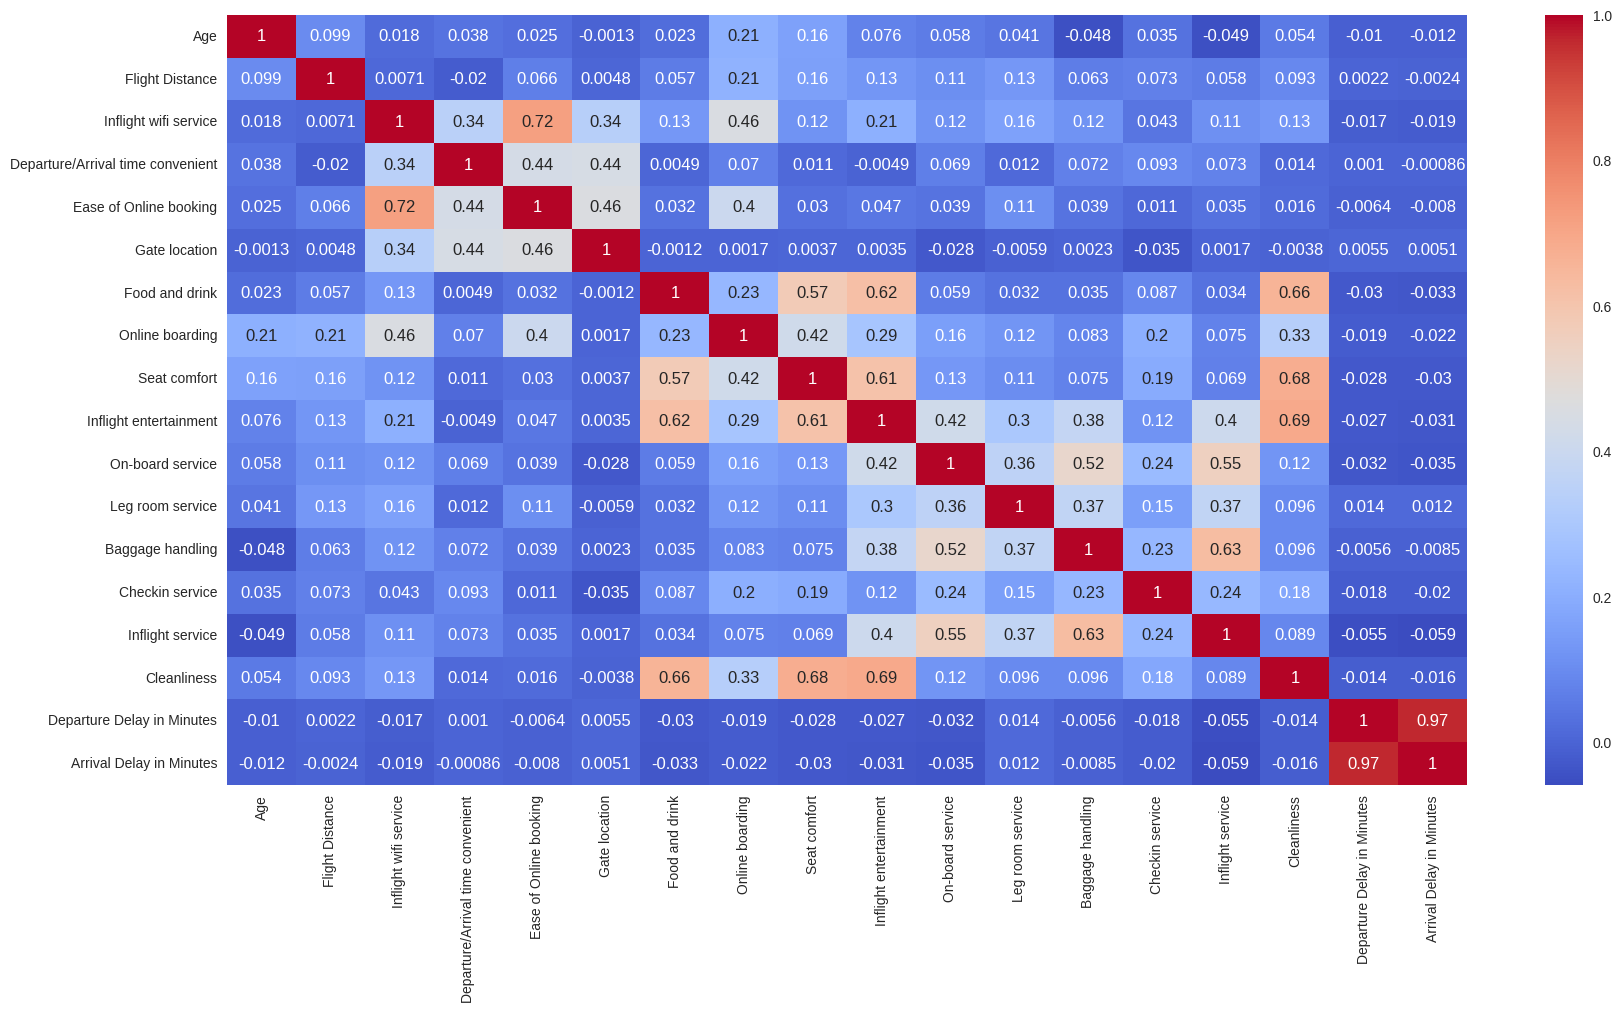

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_dt.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')

Заметим, что Arrival Delay in Minutes и Departure Delay in Minutes сильно коррелированы. Потом один из них можно будет убрать.     


Посмотрим на совместное распределение атрибутов и целевой переменной

Числовые признаки

<ipython-input-27-4dbe5c23bbf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, data=data, x="satisfaction", y=col, palette='YlGnBu')
<ipython-input-27-4dbe5c23bbf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, data=data, x="satisfaction", y=col, palette='YlGnBu')
<ipython-input-27-4dbe5c23bbf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=ax, data=data, x="satisfaction", y=col, palette='YlGnBu')
<ipython-input-27-4dbe5c23bbf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

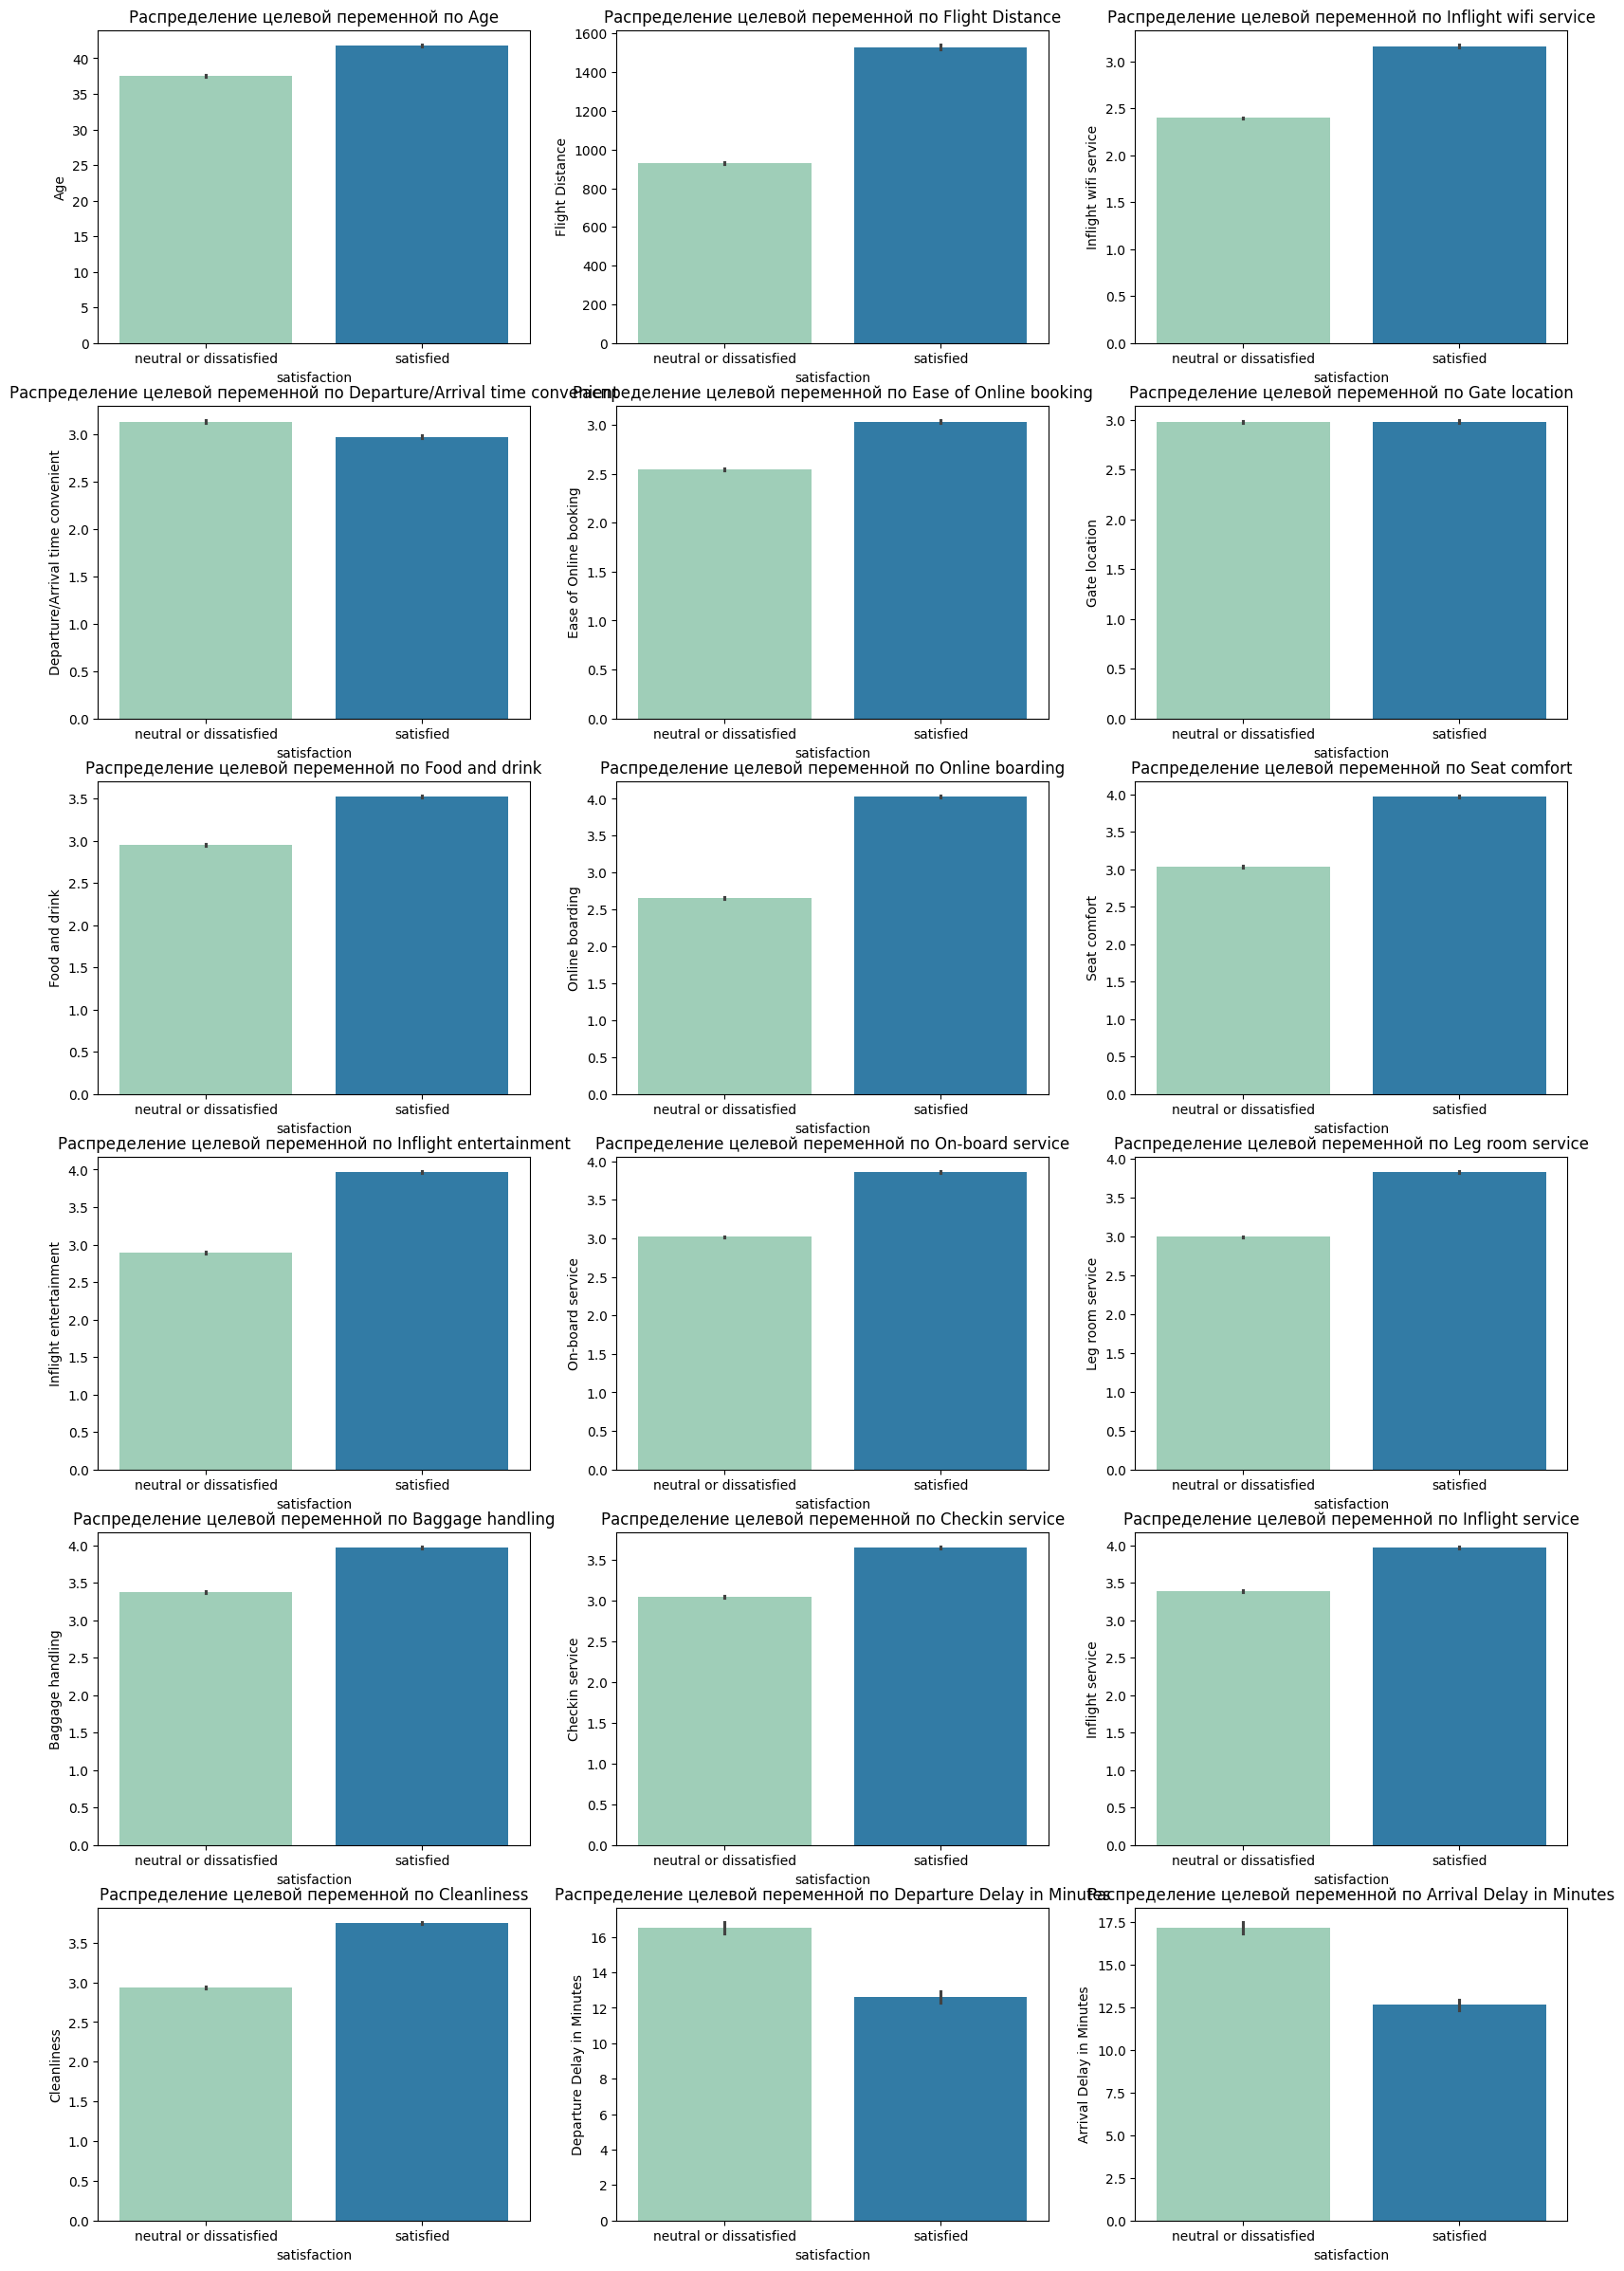

In [ ]:
numerical = train_dt.select_dtypes(include=['int64', 'float64'])
fig, axs = plt.subplots(6, 3, figsize=(20,30))


for col, ax in zip(numerical, axs.ravel()):
    ax = sns.barplot(ax=ax, data=train_dt, x="satisfaction", y=col, palette='YlGnBu')
    ax.set_title(f'Распределение целевой переменной по {col}')

Можно увидеть, что Gate location и Departyre/Arrival time convinient не играет большой роли в удовлетворенности полетом. Позже их можно будет удалить

Категориальные признаки

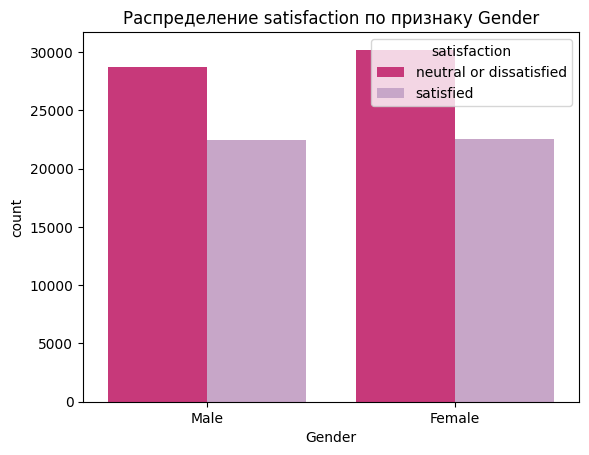

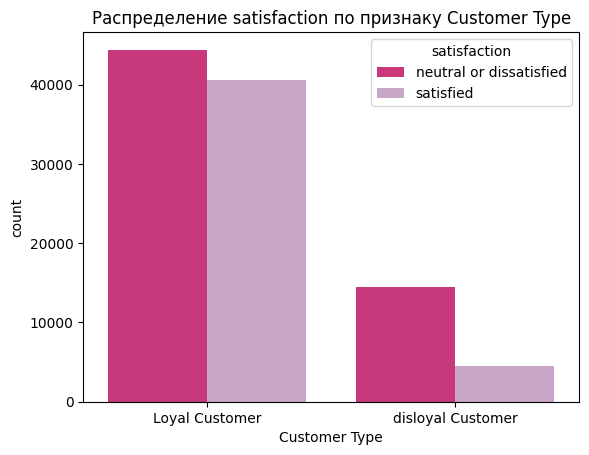

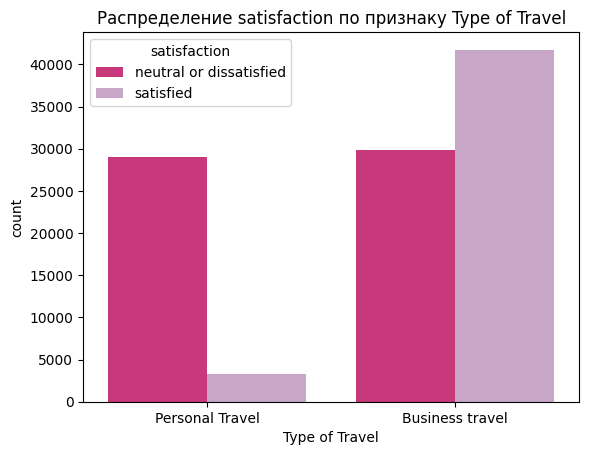

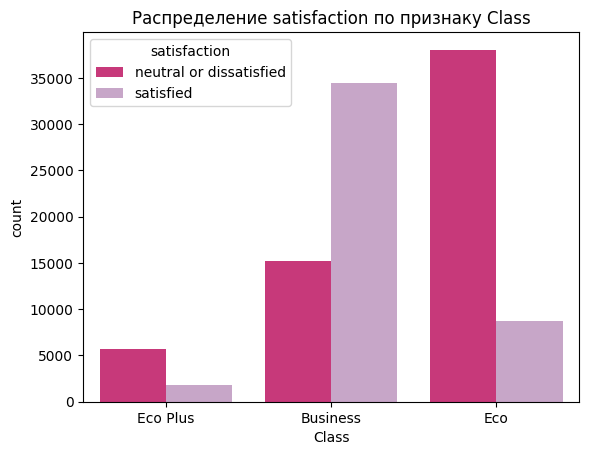

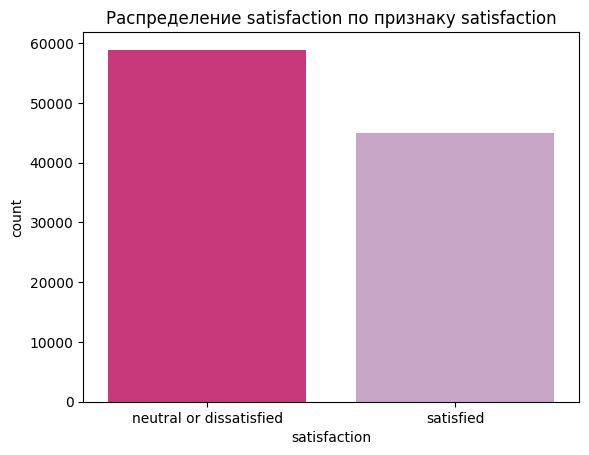

In [ ]:
categorical = train_dt.select_dtypes(exclude=['float', 'int'])

for col in categorical:
  sns.countplot( x=col, data=train_dt, hue='satisfaction', palette='PuRd_r')
  plt.title(f"Распределение satisfaction по признаку {col}")
  plt.show()

В категориальных же признаках не несет полезной информации атрибут Gender, так как уровень недовольства что у мужчин, что у женщин один и тот же

Так же стоит отметить несколько моментов:

*   Несмотря на большое количество лояльных пассажиров, все равно присутствует неуодвлетворенность полетом.
*   Те, кто летели бизнес классом более удовлетворены по сравнению с пассажирами эконом класса
*   Пассажиры, летавшие по работе, кажутся более удовлетворенными, нежели люди, которые путешествовали по иным причинам

# Feature Selection

В первую очередь вспомним, что пропуски были только у признака "Arrival Delay in Minutes", но поскольку он сильно коррелирован с "Departure Delay in Minutes", мы можем отбросить этот столбец без потери информации.    
Так же удалим столбцы 'Departure/Arrival time convenient', 'Gate location' , 'Gender' которые были указаны ранее

In [ ]:
train_dt = train_dt.drop(['Arrival Delay in Minutes', 'Departure/Arrival time convenient', 'Gate location' , 'Gender'], axis=1)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Customer Type               103904 non-null  object
 1   Age                         103904 non-null  int64 
 2   Type of Travel              103904 non-null  object
 3   Class                       103904 non-null  object
 4   Flight Distance             103904 non-null  int64 
 5   Inflight wifi service       103904 non-null  int64 
 6   Ease of Online booking      103904 non-null  int64 
 7   Food and drink              103904 non-null  int64 
 8   Online boarding             103904 non-null  int64 
 9   Seat comfort                103904 non-null  int64 
 10  Inflight entertainment      103904 non-null  int64 
 11  On-board service            103904 non-null  int64 
 12  Leg room service            103904 non-null  int64 
 13  Baggage handling            1

Теперь у нас нет пропусков в датасете

# Feature Engineering

Перейдем к бинаризации некоторых категориальных переменных c помощью  LabelEncoder

In [ ]:
le = LabelEncoder()
le_columns = ['satisfaction', "Type of Travel", 'Customer Type']

for col in le_columns:
  train_dt[col]=le.fit_transform(train_dt[col])

Закодируем Class с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений.

In [ ]:
train_dt.Class.replace({'Business': 1, 'Eco Plus': 2, 'Eco': 3}, inplace=True)

In [ ]:
train_dt.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,13,1,2,460,3,3,5,3,5,5,4,3,4,4,5,5,25,0
1,1,25,0,1,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,26,0,1,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,25,0,1,562,2,5,2,2,2,2,2,5,3,1,4,2,11,0
4,0,61,0,1,214,3,3,4,5,5,3,3,4,4,3,3,3,0,1


Это можно было сделать и с помощью OneHotEncoder, просто тогда было бы больше столбцов. Но так как такой атрибут как класс только один, я решила выбрать этот способ.

# Data Preparation

Отделим целевую переменну, разделим выборку на тестовую и тренировочную и нормализуем атрибуты

In [ ]:
X = train_dt.drop('satisfaction', axis=1)
y = train_dt.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train[['Flight Distance', 'Departure Delay in Minutes']] = scaler.fit_transform(X_train[['Flight Distance', 'Departure Delay in Minutes']])
X_test[['Flight Distance', 'Departure Delay in Minutes']] = scaler.transform(X_test[['Flight Distance', 'Departure Delay in Minutes']])

# Выбор метрик

Для оценки моделей были выбраны следующие метрики:

*   Accuracy - это метрика, которая измеряет долю правильно классифицированных объектов относительно общего числа объектов.

*   Precision - это метрика, которая измеряет долю правильно предсказанных положительных классов относительно всех объектов, которые модель предсказала как положительные.

*   Recall (полнота) - это метрика, которая измеряет долю правильно предсказанных положительных классов относительно всех истинных положительных классов.

*   F1 (F1 Score) - это гармоническое среднее между Precision и Recall, которое представляет собой компромисс между ними. F1 Score объединяет Precision и Recall в одну метрику и обычно используется в задачах классификации для оценки сбалансированности модели.

# Построение моделей

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from yellowbrick.model_selection import LearningCurve

In [ ]:
def metrics(y_true, y_pred):
  accuracy = round(accuracy_score(y_true, y_pred), 2)
  presicion = round(precision_score(y_true, y_pred), 2)
  recall = round(recall_score(y_true, y_pred), 2)
  f1 = round(f1_score(y_true, y_pred), 2)
  return accuracy, presicion, recall, f1

Логистическая регрессия

In [ ]:
LogReg = LogisticRegression(max_iter=10000000)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
log_m = metrics(y_test, y_pred)

К ближайших соседей

In [ ]:
knn = KNeighborsClassifier() # neighbours 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_m = metrics(y_test, y_pred)

Метод опорных векторов

In [ ]:
svc = SVC(max_iter=10000000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_m = metrics(y_test, y_pred)

Дерево решений

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_m = metrics(y_test, y_pred)

Создаем датафрейм для сравнения метрик моделей

In [ ]:
models = pd.DataFrame({'Model': ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier'],
                       'Accuracy':  [log_m[0], knn_m[0], svc_m[0], tree_m[0]],
                       'Precision':  [log_m[1], knn_m[1], svc_m[1], tree_m[1]],
                       'Recall':  [log_m[2], knn_m[2], svc_m[2], tree_m[2]],
                       'f1':  [log_m[3], knn_m[3], svc_m[3], tree_m[3]]
                       })
models

,Model,Accuracy,Precision,Recall,f1
0,LogisticRegression,0.87,0.87,0.84,0.85
1,KNeighborsClassifier,0.91,0.93,0.87,0.90
2,SVC,0.90,0.92,0.84,0.88
3,DecisionTreeClassifier,0.94,0.94,0.94,0.94


Мы достигли наилучших результатов с помощью DecisionTreeClassifier - 0.94 у всех метрик.

# Диагностика лучшей модели

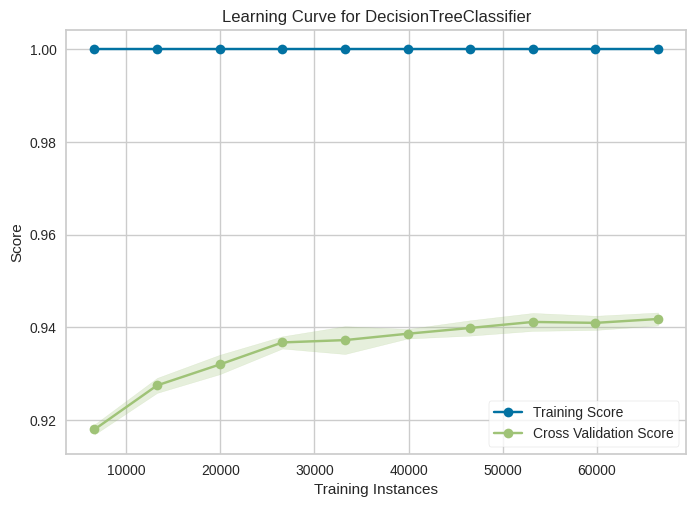

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
LearningCurve(DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X_train, y_train).show()

Здесь можно увидеть явное переобучение, однако оно характерно для деревьев без максимальной глубины. Далее посмотрим, как изменится качество модели при подборе параметров.

# Построение ансамблевой модели

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=100, random_state=12)
ada_boost.fit(X_train, y_train)

train_pred = ada_boost.predict(X_train)
test_pred = ada_boost.predict(X_test)

train_s = round(accuracy_score(y_train, train_pred), 3)
test_s = round(accuracy_score(y_test, test_pred), 3)

print('Train score = ', train_s)
print('Test_score = ', test_s)

Train score =  0.971
Test_score =  0.954


Алгоритм сначала обучает первую базовую модель на тренировочном наборе. Относительный вес некорректно предсказанных значений увеличивается. На вход второй базовой модели подаются обновлённые веса и модель обучается, после чего вырабатываются прогнозы и цикл повторяется.       
Результат работы AdaBoost - это средневзвешенная сумма каждой модели. Спрогнозированным значением ансамбля будет тот, который получает большинство взвешенный голосов.

 # Подбор гиперпараметров лучшей модели

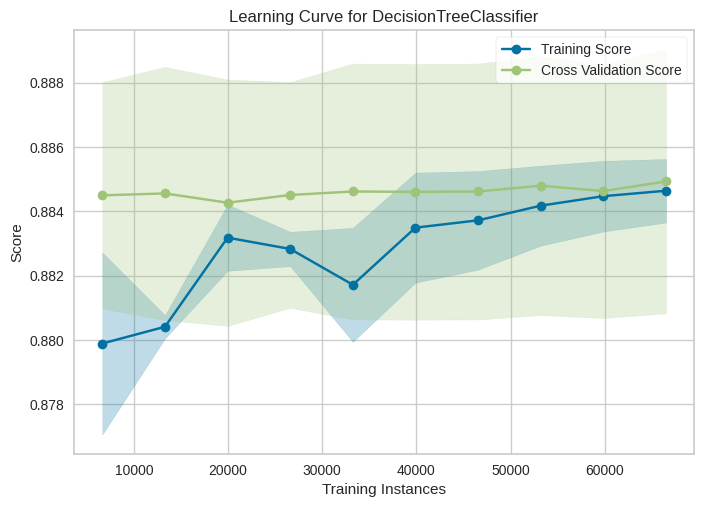

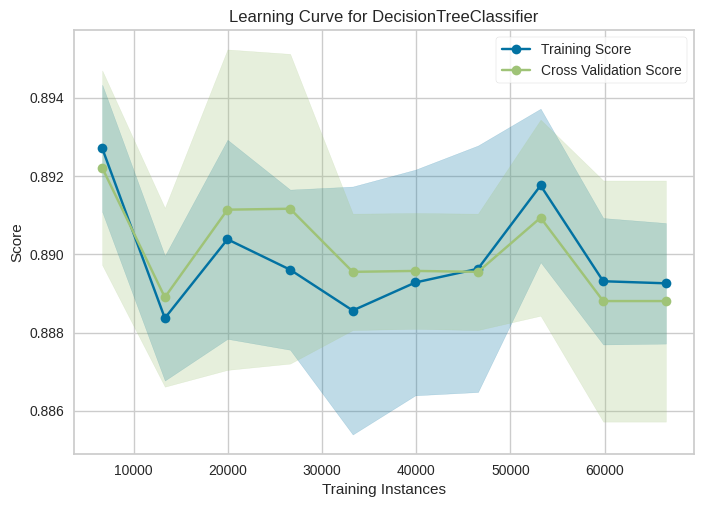

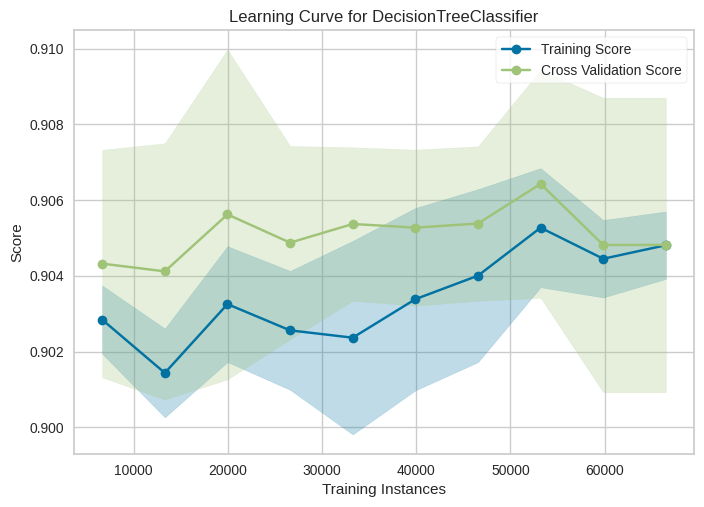

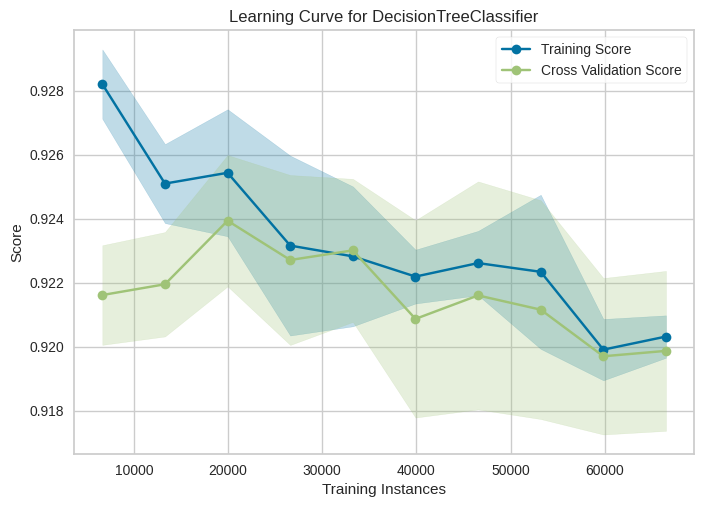

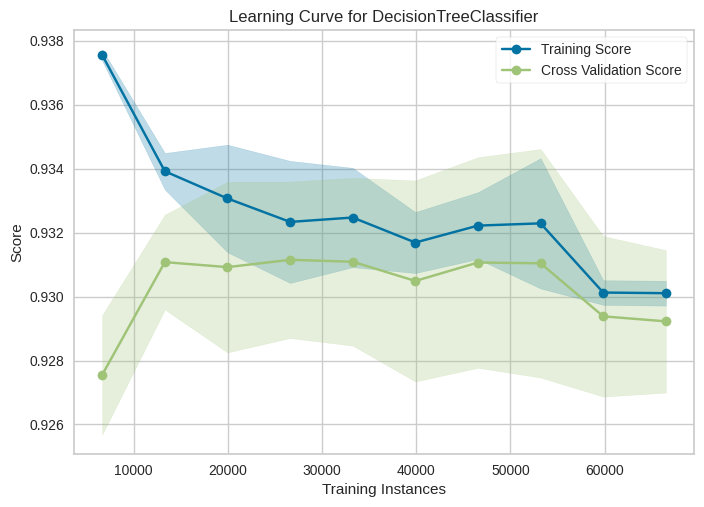

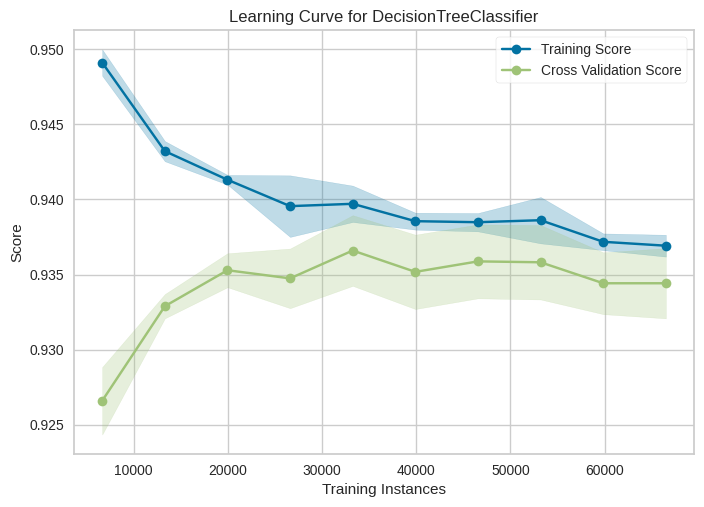

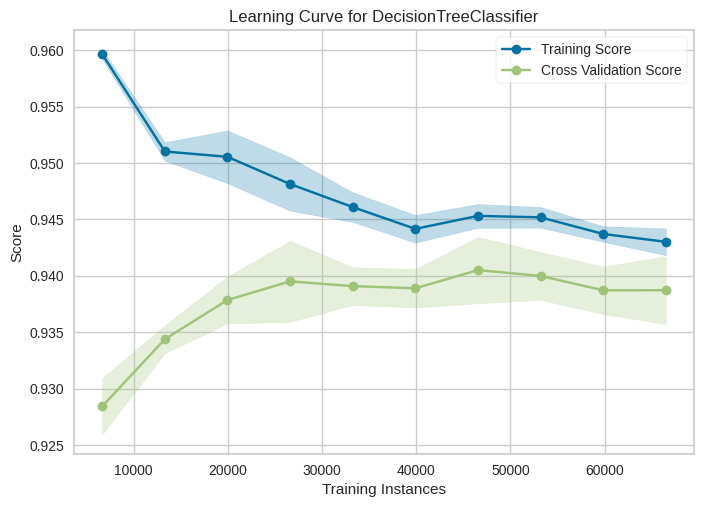

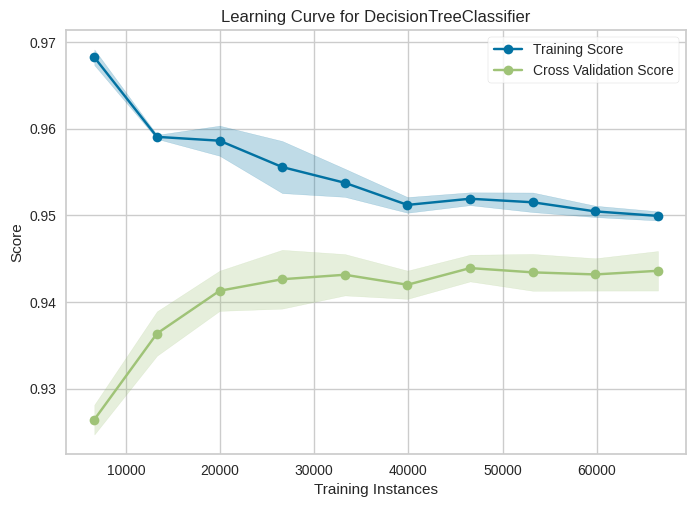

In [ ]:
for i in range(3, 11):
  LearningCurve(DecisionTreeClassifier(max_depth= i), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X_train, y_train).show()

При подборе максимальной глубины в начале наблюдается недообучение, обучающая эффективность ниже тестовой, однако с каждой итерацией ситуация выправляется, и точность модели растет. При достижении максимальной глубины - 10 - тестовая эффективность достигает максимума из рассматриваемых.

# Выводы    
В данной работе мы провели провели разведывательный анализ данных, отобрали информативные признаки, обучили несколько моделей и продиагностировали лучшую из них. Все модели хорошо справлялись с определением класса - не ниже 84%


1-Ирисы-Пропущенные Значения    
2-Диабет-Визуализация распределений        
3-Рак- Бин классификация Теоретические и эмпирические значения моедли      
4-Вина- Лин модель и Интерпретацияя коэффициентов      
5-Калифорния- Регрессия Гиперпараметры по сетке         
6-Ирисы- Множ классификация Кросс валидация        
7-Диабет- SVR Метрики        
8-Бин Лин классификация и Аргументы конструктора            
9-Вина- SVC с poly ядром и Метрики           
10-Калифорния - Линейная регрессия с регуляризацией и Аргументы коснтруктора        
https://docs.google.com/document/d/1kBOa715KQC4lrmTN9akFrxS7Hop3OR_Ocn5GumoYoTY/edit